In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("Walmart_sales_analysis.csv")
#print first few rows
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,"1,643,691",0,42.31,2.572,211,8.106
1,1,2/12/2010,"1,641,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"1,611,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"1,409,728",0,46.63,2.561,211,8.106
4,1,3/5/2010,"1,554,807",0,46.50,2.625,211,8.106


In [64]:
#print last few rows
df.tail()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,9/28/2012,"713,174",0,64.88,3.997,192,8.684
6431,45,10/5/2012,"733,455",0,64.89,3.985,192,8.667
6432,45,10/12/2012,"734,464",0,54.47,4.000,192,8.667
6433,45,10/19/2012,"718,126",0,56.47,3.969,192,8.667
6434,45,10/26/2012,"760,281",0,58.85,3.882,192,8.667


In [65]:
#check null values
df.isnull().sum()

Store_Number    0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
 CPI            0
Unemployment    0
dtype: int64

In [66]:
df.describe()

,Store_Number,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.583994,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.351305,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.000000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,132.000000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,183.000000,7.874000
75%,34.000000,0.000000,74.940000,3.735000,213.000000,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.000000,14.313000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB


In [68]:
df.dtypes

Store_Number      int64
Date             object
Weekly_Sales     object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
 CPI              int64
Unemployment    float64
dtype: object

In [87]:
df["Weekly_Sales"] = (df["Weekly_Sales"].astype(str).str.replace(",", "", regex=True).astype(float))

In [88]:
# create month and year column for further analysis
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Month"] = df["Date"].dt.month_name()
df["Year"] = df["Date"].dt.year
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643691.0,0,42.31,2.572,211,8.106,February,2010
1,1,2010-02-12,1641957.0,1,38.51,2.548,211,8.106,February,2010
2,1,2010-02-19,1611968.0,0,39.93,2.514,211,8.106,February,2010
3,1,2010-02-26,1409728.0,0,46.63,2.561,211,8.106,February,2010
4,1,2010-03-05,1554807.0,0,46.50,2.625,211,8.106,March,2010


In [93]:
#calculate total sales by year and month
total_sales = (
    df.groupby(["Year","Month"])["Weekly_Sales"]
      .sum().reset_index()
)
pd.options.display.float_format = '{:,.0f}'.format
total_sales

,Year,Month,Weekly_Sales
0,2010,April,"231,412,370"
1,2010,August,"187,640,109"
2,2010,December,"288,760,533"
3,2010,February,"190,332,986"
4,2010,July,"232,580,128"
5,2010,June,"192,246,177"
6,2010,March,"181,919,798"
7,2010,May,"186,710,937"
8,2010,November,"202,853,374"
9,2010,October,"217,161,819"


In [99]:
#calculating YoY_Growth %
total_yearly_sales = (
    df.groupby(["Year"])["Weekly_Sales"]
      .sum().reset_index()
)
pd.options.display.float_format = '{:,.0f}'.format
total_yearly_sales["YoY_Growth_%"] = total_yearly_sales["Weekly_Sales"].pct_change() * 100
total_yearly_sales

,Year,Weekly_Sales,YoY_Growth_%
0,2010,"2,288,886,130",NaN
1,2011,"2,448,200,019",7
2,2012,"2,000,132,859",-18


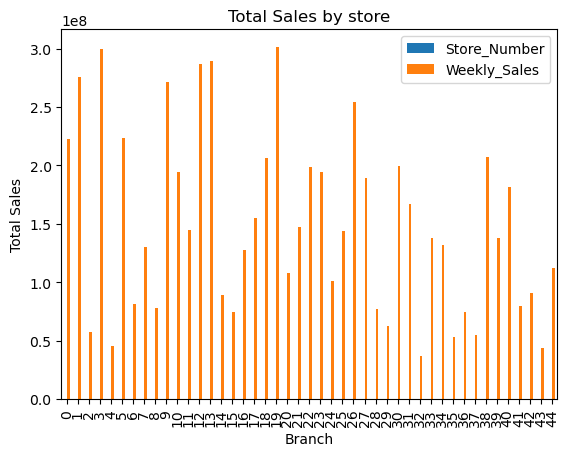

In [120]:
#total sales by store
total_sales_by_store = (
    df.groupby(["Store_Number"])["Weekly_Sales"].sum().reset_index()
)
total_sales_by_store.plot(kind="bar")
plt.plot(30,8)
plt.title("Total Sales by store")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.savefig("visualizations/total_sales_by_store.png")
plt.show()


In [114]:
#calculating quarterly sales for each year
month_to_quarter = {
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
}

df["Quarter"] = df["Month"].map(month_to_quarter)

# Aggregate sales by Year and Quarter
quarterly_sales = df.groupby(["Year", "Quarter"])["Weekly_Sales"].sum().reset_index()
print(quarterly_sales)

    Year Quarter  Weekly_Sales
0   2010      Q1   372,252,784
1   2010      Q2   610,369,484
2   2010      Q3   597,488,136
3   2010      Q4   708,775,726
4   2011      Q1   529,391,746
5   2011      Q2   597,948,054
6   2011      Q3   639,358,476
7   2011      Q4   681,501,743
8   2012      Q1   592,467,701
9   2012      Q2   618,297,711
10  2012      Q3   605,005,770
11  2012      Q4   184,361,677


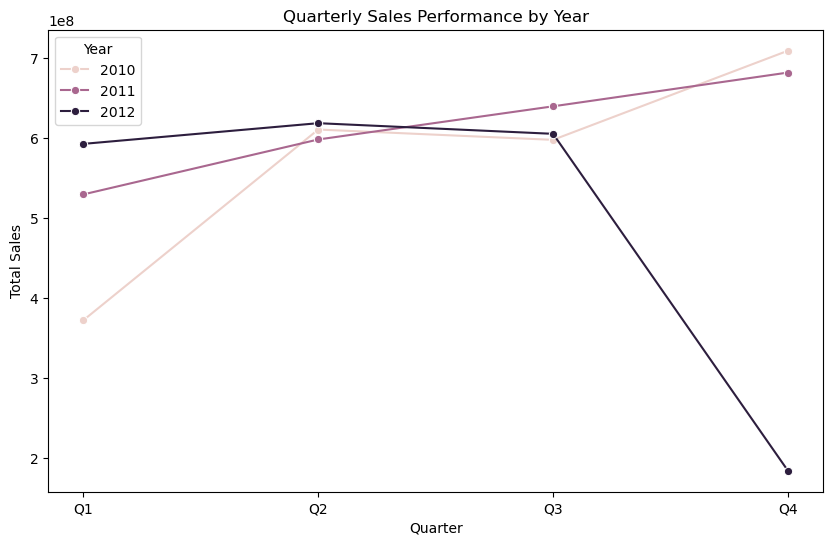

In [115]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=quarterly_sales, x="Quarter", y="Weekly_Sales", hue="Year", marker='o')
plt.title("Quarterly Sales Performance by Year")
plt.ylabel("Total Sales")
plt.savefig("visualizations/quaterly_sales_performance.png")
plt.show()

In [116]:
#analysing temperature effect on sales
# Ensure proper types
df['Temperature'] = df['Temperature'].astype(float)

In [117]:
# Flag extreme temperatures
df['Extreme_Temp'] = df['Temperature'].apply(lambda x: 'Low (<32F)' if x < 32 else ('High (>90F)' if x > 90 else 'Normal'))

# Average sales by temperature category
temp_sales = df.groupby('Extreme_Temp')['Weekly_Sales'].mean().reset_index()
print(temp_sales)

  Extreme_Temp  Weekly_Sales
0  High (>90F)       796,966
1   Low (<32F)     1,050,918
2       Normal     1,054,495


C:\Users\darsh\AppData\Local\Temp\ipykernel_21476\2996784020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_sales, x='Extreme_Temp', y='Weekly_Sales', palette='coolwarm')


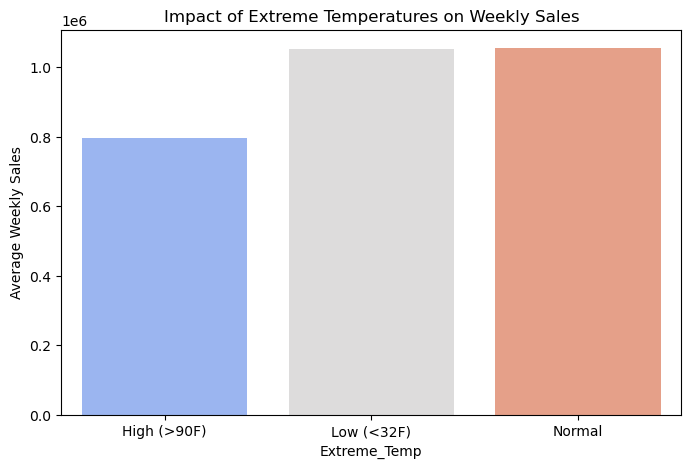

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=temp_sales, x='Extreme_Temp', y='Weekly_Sales', palette='coolwarm')
plt.title('Impact of Extreme Temperatures on Weekly Sales')
plt.ylabel('Average Weekly Sales')
plt.savefig("visualizations/impact_of_extreme_weather.png")
plt.show()